In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from autoencoder import autoencoder
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import AveragePooling1D, Activation, Flatten, Dense
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalAveragePooling1D, UpSampling1D
from keras.models import Model
from keras.regularizers import l2
#from sklearn.model_selection import train_test_split

/Users/xufanxiong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(1)

dTrain1 = sio.loadmat('Train_1_Correct_PPG1_TimeDist3.mat')
dTrain2 = sio.loadmat('Train_1_Correct_PPG2_TimeDist3.mat')

In [3]:
heartTrain = (dTrain1['Hr_train1'] - 50) / 150

signalTrain1 = dTrain1['Train1']
signalTrain2 = dTrain2['Train2']

s1 = signalTrain1.shape
signalTrain = np.zeros((s1[0], s1[1], s1[2], 2))

signalTrain[:, :, :, 0] = signalTrain1
signalTrain[:, :, :, 1] = signalTrain2

print('Shape of signalTrain1: ' + str(signalTrain1.shape))
print('Shape of signalTrain2 ' + str(signalTrain2.shape))
print('Shape of signalTrain: ' + str(signalTrain.shape))
print('Shape of heartTrain: ' + str(heartTrain.shape))

Shape of signalTrain1: (6716, 3, 1200)
Shape of signalTrain2 (6716, 3, 1200)
Shape of signalTrain: (6716, 3, 1200, 2)
Shape of heartTrain: (6716, 1)


In [4]:
#plt.plot(range(1200), signalTrain[10,2,:,1])

In [5]:
np.random.seed(1)

dTest1 = sio.loadmat('Test_1_Correct_PPG1_TimeDist3.mat')
dTest2 = sio.loadmat('Test_1_Correct_PPG2_TimeDist3.mat')

In [6]:
heartTestA = (dTest1['Hr_testA1'] - 50) / 150

signalTestA1 = dTest1['TestA1']
signalTestA2 = dTest2['TestA2']

s2 = signalTestA1.shape
signalTestA = np.zeros((s2[0], s2[1], s2[2], 2))

signalTestA[:, :, :, 0] = signalTestA1
signalTestA[:, :, :, 1] = signalTestA2

print('Shape of signalTestA1: ' + str(signalTestA1.shape))
print('Shape of signalTestA2: ' + str(signalTestA2.shape))
print('Shape of signalTestA: ' + str(signalTestA.shape))
print('Shape of heartTestA: ' + str(heartTestA.shape))

Shape of signalTestA1: (230, 3, 1200)
Shape of signalTestA2: (230, 3, 1200)
Shape of signalTestA: (230, 3, 1200, 2)
Shape of heartTestA: (230, 1)


In [7]:
np.random.seed(1)

dTest1 = sio.loadmat('Low_1_Correct_PPG1_TimeDist3.mat')
dTest2 = sio.loadmat('Low_1_Correct_PPG2_TimeDist3.mat')

In [8]:
heartTestB = (dTest1['Hr_testA1'] - 50) / 150

signalTestB1 = dTest1['TestA1']
signalTestB2 = dTest2['TestA2']

s3 = signalTestB1.shape
signalTestB = np.zeros((s3[0], s3[1], s3[2], 2))

signalTestB[:, :, :, 0] = signalTestB1
signalTestB[:, :, :, 1] = signalTestB2

print('Shape of signalTestB1: ' + str(signalTestB1.shape))
print('Shape of signalTestB2: ' + str(signalTestB2.shape))
print('Shape of signalTestB: ' + str(signalTestB.shape))
print('Shape of heartTestB: ' + str(heartTestB.shape))

Shape of signalTestB1: (230, 3, 1200)
Shape of signalTestB2: (230, 3, 1200)
Shape of signalTestB: (230, 3, 1200, 2)
Shape of heartTestB: (230, 1)


In [9]:
X_train = signalTrain[:, 2, :, :]
Y_train = heartTrain
X_test1 = signalTestA[:, 2, :, :]
Y_test1 = heartTestA
X_test2 = signalTestB[:, 2, :, :]
Y_test2 = heartTestB

In [10]:
X_test1.shape

(230, 1200, 2)

In [11]:
def normali(input):
    tem = input[:, :, 0]
    tem = tem/np.dot((np.max(tem, axis=1, keepdims=True)-np.min(tem, axis=1, keepdims=True)), np.ones((1, 1200)))
    input[:, :, 0] = tem
    
    tem = input[:, :, 1]
    tem = tem/np.dot((np.max(tem, axis=1, keepdims=True)-np.min(tem, axis=1, keepdims=True)), np.ones((1, 1200)))
    input[:, :, 1] = tem
    
    return input

In [12]:
X_train = normali(X_train)
X_test1 = normali(X_test1)
X_test2 = normali(X_test2)

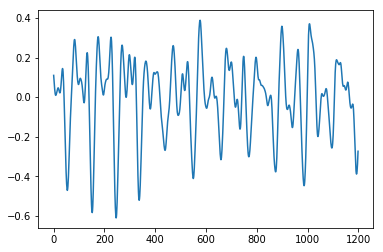

In [13]:
plt.plot(range(1200), X_train[100, :, 1])

In [14]:
model = autoencoder((1200, 2))

In [15]:
model.compile(loss= "mse", 
              optimizer="adam", 
              metrics=["mse"])

In [17]:
filepath="weight_3.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_mean_squared_error', 
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks_list = [checkpoint]
history = model.fit(X_train, X_train, 
                    epochs=30, 
                    batch_size=32, 
                    validation_split=0.25, 
                    callbacks=callbacks_list)

Train on 5037 samples, validate on 1679 samples
Epoch 1/30
5037/5037 [==============================] - 13s 3ms/step - loss: 0.0065 - mean_squared_error: 0.0023 - val_loss: 0.0063 - val_mean_squared_error: 0.0024

Epoch 00001: val_mean_squared_error improved from inf to 0.00243, saving model to weight_3.hdf5
Epoch 2/30
5037/5037 [==============================] - 13s 3ms/step - loss: 0.0058 - mean_squared_error: 0.0022 - val_loss: 0.0056 - val_mean_squared_error: 0.0022

Epoch 00002: val_mean_squared_error improved from 0.00243 to 0.00222, saving model to weight_3.hdf5
Epoch 3/30
5037/5037 [==============================] - 14s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0021 - val_loss: 0.0053 - val_mean_squared_error: 0.0023

Epoch 00003: val_mean_squared_error did not improve from 0.00222
Epoch 4/30
5037/5037 [==============================] - 13s 3ms/step - loss: 0.0048 - mean_squared_error: 0.0020 - val_loss: 0.0048 - val_mean_squared_error: 0.0021

Epoch 00004: val_mean_squar

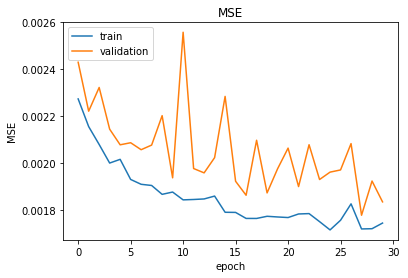

In [18]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

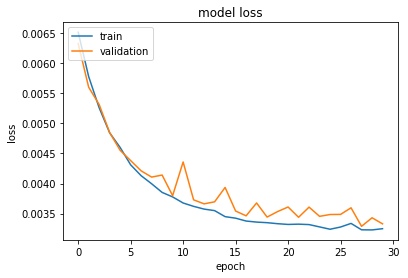

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
filepath="weight_3.hdf5"
model.load_weights(filepath)

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1200, 2)           0         
_________________________________________________________________
activation_1 (Activation)    (None, 1200, 2)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1200, 16)          144       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 600, 16)           0         
_________________________________________________________________
activation_2 (Activation)    (None, 600, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 600, 32)           2080      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 300, 32)           0         
__________

In [22]:
layer_out = model.layers[10].output

newlayer = Conv1D(32, 4, padding='same',
                    kernel_initializer='glorot_uniform',
                    kernel_regularizer=l2(1e-4))(layer_out)
newlayer = UpSampling1D(2)(newlayer)

newlayer = Conv1D(128, 4, padding='same',
                    kernel_initializer='glorot_uniform',
                    kernel_regularizer=l2(1e-4))(newlayer)
newlayer = MaxPooling1D(pool_size=2)(newlayer)

newlayer = Activation('relu')(newlayer)
newlayer = Conv1D(64, 4, padding='same',
                    kernel_initializer='glorot_uniform',
                    kernel_regularizer=l2(1e-4))(newlayer)
newlayer = MaxPooling1D(pool_size=2)(newlayer)

newlayer = Activation('relu')(newlayer)
newlayer = Conv1D(16, 4, padding='same',
                    kernel_initializer='glorot_uniform',
                    kernel_regularizer=l2(1e-4))(newlayer)
#newlayer = GlobalAveragePooling1D()(newlayer)

newlayer = Flatten()(newlayer)
newlayer = Dense(64, activation='relu')(newlayer)
newlayer = Dense(16, activation='relu')(newlayer)

out = Dense(1, activation='sigmoid', 
               kernel_initializer='glorot_uniform')(newlayer)

newmodel = Model(input=model.input, output=out)

# Freeze the layers
for layer in newmodel.layers[:10]:
    layer.trainable = False


/Users/xufanxiong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [23]:
newmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1200, 2)           0         
_________________________________________________________________
activation_1 (Activation)    (None, 1200, 2)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1200, 16)          144       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 600, 16)           0         
_________________________________________________________________
activation_2 (Activation)    (None, 600, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 600, 32)           2080      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 300, 32)           0         
__________

In [26]:
newmodel.compile(loss= "mse", 
              optimizer="adam", 
              metrics=["mse"])

In [28]:
filepath="weight_3_3.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks_list = [checkpoint]
history = newmodel.fit(X_train, Y_train, 
                    epochs=30, 
                    batch_size=32, 
                    validation_split=0.25, 
                    callbacks=callbacks_list)

Train on 5037 samples, validate on 1679 samples
Epoch 1/30
5037/5037 [==============================] - 11s 2ms/step - loss: 0.0065 - mean_squared_error: 0.0037 - val_loss: 0.0090 - val_mean_squared_error: 0.0062

Epoch 00001: val_loss improved from inf to 0.00897, saving model to weight_3_3.hdf5
Epoch 2/30
5037/5037 [==============================] - 11s 2ms/step - loss: 0.0065 - mean_squared_error: 0.0038 - val_loss: 0.0076 - val_mean_squared_error: 0.0050

Epoch 00002: val_loss improved from 0.00897 to 0.00765, saving model to weight_3_3.hdf5
Epoch 3/30
5037/5037 [==============================] - 11s 2ms/step - loss: 0.0060 - mean_squared_error: 0.0035 - val_loss: 0.0102 - val_mean_squared_error: 0.0077

Epoch 00003: val_loss did not improve from 0.00765
Epoch 4/30
5037/5037 [==============================] - 11s 2ms/step - loss: 0.0063 - mean_squared_error: 0.0038 - val_loss: 0.0077 - val_mean_squared_error: 0.0054

Epoch 00004: val_loss did not improve from 0.00765
Epoch 5/30
503

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

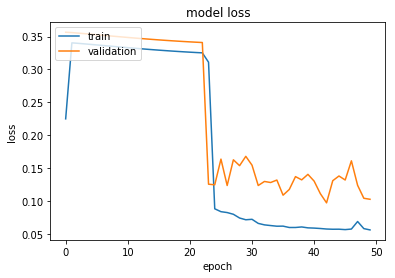

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()